In [1]:
import scipy
import numpy as np
from scipy.sparse import csr_matrix
from scipy.sparse import coo_matrix
import sys
import os
import matplotlib.pyplot as plt
np.set_printoptions(threshold=sys.maxsize)

# W zmiennych positive i negative będziemy przechowywać rozwiązania spełniające i niespełniające warunków problemu.

In [2]:
positive, negative = [], []

# Funkcja genSolution generuje rozwiązanie spełniające 2 warunki:
# $\forall i = 1, .., N_{M} : \sum \limits _{j=1} ^{N_{T}} x_{ij} \le 1$
# $\forall i = 1, .., N_{T} : \sum \limits _{i=1} ^{N_{M}} x_{ij} \ge 1$

In [3]:
def genSolution(T,M,TEST):
    print(T,M,TEST)
    mach = np.random.choice(list(range(M)), size=TEST, replace=False)
    tasks = np.hstack((np.random.RandomState().permutation(T), np.random.choice(list(range(T)), size=TEST-T, replace=True)))
    return mach,tasks

In [4]:
NT= 10
NM = 50

E = np.random.random(NT)
D = np.random.random(NT)
eta = np.random.random((NT, NM))
rows, cols = genSolution(NT, NM, NM)
X = coo_matrix((np.ones(NM), (cols, rows)), shape=(NT, NM)).todense()
print(X.shape)
print(E.shape)
print(D.shape)
print(eta.shape)

10 50 50
(10, 50)
(10,)
(10,)
(10, 50)


# Funkcja check_X sprawdza rozwiązanie pod kątem dwóch warunków rozwiązania generowanego przez genSolution oraz dodatkowo sprawdza trzeci warunek:
# $\forall j = 1, ..., N_{T} : t_{j} = \frac{e_{j}}{\sum \limits _{i=1} ^{N_{M}} n_{ij}x_{ij}} \leq d_{ij}$

In [5]:
def check_X(X, E, D, eta):
    assert np.all(np.sum(X, axis=0) <= 1)
    assert np.all(np.sum(X, axis=1) >= 1)
    if(np.sum((E / np.sum(np.multiply(eta, X), axis=1) - D) > 0) == len(E)):
        print("test positive")
        positive.append([X, E, D, eta])
    else:
        negative.append([X, E, D, eta])
        
    

# Możemy zauważyć, że macierz rozwiązań $X$ jest macierzą rzadką, dlatego potencjalnie może opłacać się przechowywanie jako macierzy (listy) koordynatów

In [6]:
def getData(NT, NM):
    E = np.random.random(NT)
    D = np.random.random(NT)
    eta = np.random.random((NT, NM))
    rows, cols = genSolution(NT, NM, NM)
    X = coo_matrix((np.ones(NM), (cols, rows)), shape=(NT, NM)).todense()
    print(X.shape)
    print(E.shape)
    print(D.shape)
    print(eta.shape)
    return X, E, D, eta

In [190]:
check_X(*getData(10, 50))

10 50 50
(10, 50)
(10,)
(10,)
(10, 50)


In [191]:
def save_list(listname):
    list = eval(listname)
    for i, example in enumerate(list[:10]):
        object_list = np.empty(4, object)
        object_list[:] = list[i]
        np.save(os.path.join(listname, f'test{i}.npy'), object_list)  

In [192]:
save_list("positive")
save_list("negative")

# Wizualizacja rozwiązań

In [193]:
def show_example(example):
    plt.title("machines chosen for tasks")
    plt.xlabel("machine")
    plt.ylabel("tasks")
    plt.imshow(example[0])
    plt.colorbar()
    plt.show()
    plt.title("tasks effort")
    plt.xlabel("task")
    plt.ylabel("effort")
    plt.bar(range(len(example[1])),example[1])
    plt.show()
    plt.title("tasks deadline length")
    plt.xlabel("task")
    plt.ylabel("deadline")
    plt.bar(range(len(example[2])),example[2])
    plt.show()
    plt.title("effectivity of machines doing given task")
    plt.xlabel("machine")
    plt.ylabel("tasks")
    plt.imshow(example[3])
    plt.colorbar()
    plt.show()

In [194]:
b = np.load('positive//test0.npy', allow_pickle=True)

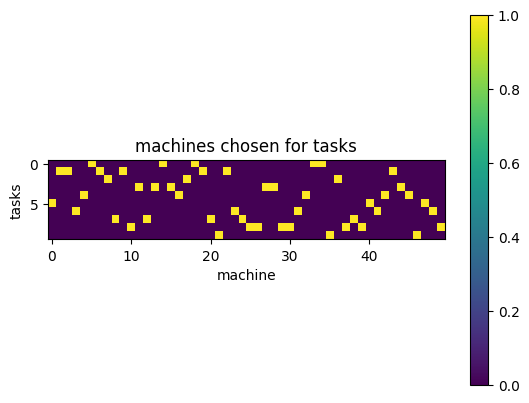

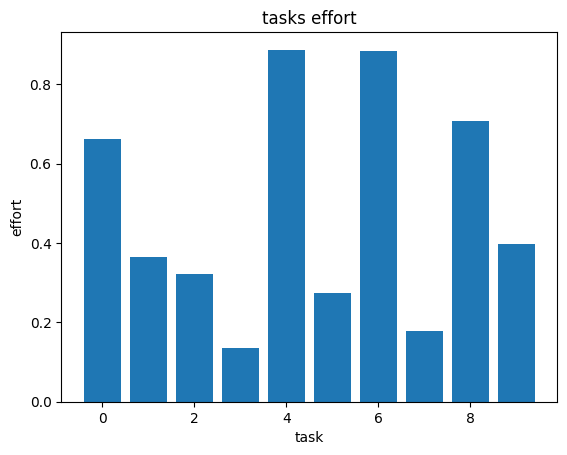

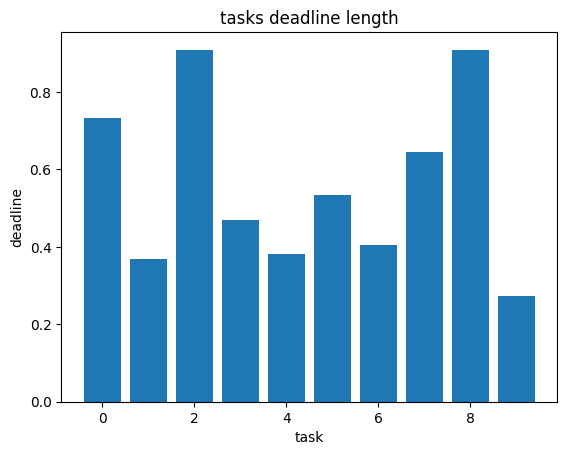

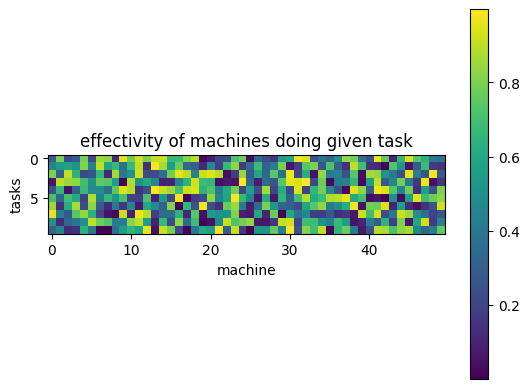

In [195]:
show_example(b)